In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_set = pd.read_csv('set_2.csv')

In [4]:
num_set = []
for value in data_set:
    #value_mod = value.replace('.', '', 2) #Для третьего сета
    num_set.append(float(value))


In [5]:
max_value = max(num_set)
min_value = min(num_set)
print(f"Максимальное значение случайной величины: {max_value}")
print(f"Минимальное значение случайной величины: {min_value}")

Максимальное значение случайной величины: 698.777979
Минимальное значение случайной величины: -1071.786686


In [6]:
num_of_intervals = 20

intervals = []
step = (max_value-min_value)/num_of_intervals
interval_start = min_value

for i in range(0, num_of_intervals):
    interval = [interval_start, interval_start + step]
    intervals.append(interval)
    interval_start += step 
    
print(f"Интервалы, которые выбраны для сглаживания: {intervals}")

Интервалы, которые выбраны для сглаживания: [[-1071.786686, -983.25845275], [-983.25845275, -894.7302195], [-894.7302195, -806.20198625], [-806.20198625, -717.673753], [-717.673753, -629.1455197500001], [-629.1455197500001, -540.6172865000001], [-540.6172865000001, -452.0890532500001], [-452.0890532500001, -363.56082000000015], [-363.56082000000015, -275.0325867500002], [-275.0325867500002, -186.50435350000018], [-186.50435350000018, -97.97612025000018], [-97.97612025000018, -9.44788700000018], [-9.44788700000018, 79.08034624999982], [79.08034624999982, 167.60857949999982], [167.60857949999982, 256.1368127499998], [256.1368127499998, 344.66504599999985], [344.66504599999985, 433.1932792499998], [433.1932792499998, 521.7215124999998], [521.7215124999998, 610.2497457499998], [610.2497457499998, 698.7779789999997]]


In [7]:
interval_count = [0 for i in range(0, num_of_intervals)]

for i in num_set:
    for j in range(0, num_of_intervals):
        if i < intervals[j][1] and i >= intervals[j][0]:
            interval_count[j] += 1
            
for i in range(0, num_of_intervals):
    interval_count[i] = interval_count[i]/len(num_set)
print(f"Вероятности попадания элементов на интервалы: {interval_count}")            

Вероятности попадания элементов на интервалы: [0.0003, 0.0, 0.0001, 0.0, 0.0007, 0.0019, 0.0039, 0.0027, 0.0005, 0.0083, 0.0722, 0.2827, 0.3833, 0.1944, 0.0397, 0.0063, 0.0023, 0.0004, 0.0001, 0.0001]


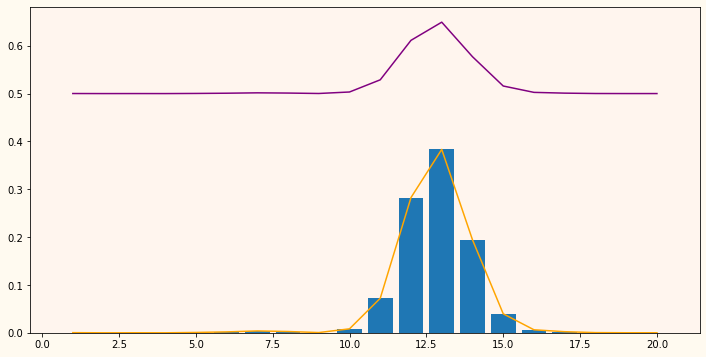

In [8]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [i for i in range (1, num_of_intervals + 1)]
y = interval_count

fig = plt.figure()                      #гистограмма
ax_core = fig.add_subplot()
ax_core.bar(x, y)
ax_core.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6)

plt.plot(x, y, color="orange")          #график распределения гистограммы
                               
plist = stats.norm.cdf(y)            #нормальное распределение
plt.plot(x, plist, color="purple")
plt.show()


In [9]:
#Выдвигаем предположение, что случайная величина имеет нормальное распределение.

In [10]:
#Критерий Пирсона

x_empirical = interval_count
x_theoretical = stats.geom.cdf(x, y)

for i in x_theoretical:
    if np.isnan(i):
        i = 0

сhi_squared = 0

for i in range(0, 20):
    if x_empirical[i] != 0:
        сhi_squared += (x_theoretical[i] - x_empirical[i])**2/x_theoretical[i]
    
сhi_squared *= len(num_set)
print(f"Хи-квадрат: {сhi_squared}")

Хи-квадрат: 25263.240941969634


In [11]:
#При данных степенях свободы 9 и альфа 0.01 значение хи-квадрата должно быть менее 21.07

#Полученный хи-квадрат несоизмеримо больше, что говорит о том, что различие с теоретическим вызвано неслучайным явлением

In [12]:
#Несмещенную состоятельную оценку мат ожидания

gen_avg = 0
for i in num_set:
    gen_avg += i

gen_avg /= len(num_set)
print(f"Несмещенная состоятельная оценка мат ожидания: {gen_avg}")

Несмещенная состоятельная оценка мат ожидания: 16.243283213799984


In [13]:
#Найдем смещенную состоятельную оценку дисперсии

gen_dispersion = 0
for i in num_set:
    gen_dispersion += (i - gen_avg)**2

gen_dispersion /= len(num_set)
gen_dispersion = np.sqrt(gen_dispersion) 

print(f"Смещенная состоятельная оценка дисперсии: {gen_dispersion}")

Смещенная состоятельная оценка дисперсии: 104.53422706297388


In [14]:
#Найдем несмещенную состоятельную оценку дисперсии

point_dispersion = 0
for i in num_set:
    point_dispersion += (i - gen_avg)**2
    
point_dispersion /= len(num_set) - 1
point_dispersion = np.sqrt(point_dispersion) 

print(f"Несмещенная состоятельняа оценка дисперсии: {point_dispersion}")

Несмещенная состоятельняа оценка дисперсии: 104.53945416636304


In [15]:
#Найдем среднее квадратичное отклонение

avg_sq = np.sqrt(point_dispersion)
print(f"Cреднее квадратичное отклонение: {avg_sq}")

Cреднее квадратичное отклонение: 10.224453734374421


In [16]:
#Имеем n = 100000 и доверительную вероятность 0.95 получаем следующее значение распределения Стьюдента

t = 1.9599877077718446

delta = point_dispersion*t/np.sqrt(len(num_set) - 1)
print(f"Дельта: {delta}")

Дельта: 2.049062907139311


In [17]:
#Тогда доверительный интервал для мат ожидания

x_1 = gen_avg - delta
x_2 = gen_avg + delta

print(f"{x_1} <= m_x < {x_2}")

14.194220306660673 <= m_x < 18.292346120939296


In [18]:
#Найдем доверительный интервал для дисперсии

#Хи-квадрат для вероятности (1 - 0.95)/2 и степени свободы 10000 - 1
chi_1 = 9723.732237

#Хи-квадрат для вероятности (1 + 0.95)/ и степени свободы 10000 - 1
chi_2 = 10278.05632

print(f"{len(num_set)*point_dispersion**2/chi_1} <= D_x < {len(num_set)*point_dispersion**2/chi_2}")

11238.994668957295 <= D_x < 10632.84451568477
